# Covid-19 Radiograph Data exploration:

The studyID related to the study-level predictions and the image ID pretains to the image-level predictions.
Two csv:
1. train_study_level.csv
2. trian_image_level.csv

In [6]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydicom
from pydicom import dcmread
import os

In [56]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [8]:


root_dir = 'C://users/cathx/repos/covid19/data/'

image_data = root_dir + 'train_image_level.csv'
study_data = root_dir + 'train_study_level.csv'

# read the two csv
image_csv = pd.read_csv(image_data)
study_csv = pd.read_csv(study_data)


In [9]:
image_csv.head()

,id,boxes,label,StudyInstanceUID
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed
2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7
3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2
4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e


In [10]:
study_csv.head()

,id,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,00086460a852_study,0,1,0,0
1,000c9c05fd14_study,0,0,0,1
2,00292f8c37bd_study,1,0,0,0
3,005057b3f880_study,1,0,0,0
4,0051d9b12e72_study,0,0,0,1


In [20]:
sample_img = '000a312787f2.dcm'
lens = len(sample_img)

In [29]:
st = 'elonmusk'
part = st[-5:]
part

'nmusk'

In [12]:
fpath = 'C:/Users/cathx/repos/covid19/train'
links = []
for folder in os.listdir(fpath):
    link = fpath + '/' + folder
    for img in os.listdir(link):
        imgs = link + '/' + img
        for k in os.listdir(imgs):
            links.append(imgs + '/' + k)

In [19]:
links[0][:-len('000a312787f2.dcm')]

'C:/Users/cathx/repos/covid19/train/00086460a852/9e8302230c91/'

In [46]:
img_data = '000a312787f2_image'
for i in image_csv['id']:
    if image_csv['id'] == img_data:
        print(image_csv[id])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [58]:
row = image_csv.loc[image_csv['id'] == img_data]

In [63]:
row['boxes']

0    [{'x': 789.28836, 'y': 582.43035, 'width': 102...
Name: boxes, dtype: object

In [61]:
x = row['boxes']['x']
x

KeyError: 'x'

In [34]:
for i in links:
#     print(i[:-lens])
    if i[-len('000a312787f2.dcm'):] == '000a312787f2.dcm':
        sample_i = i

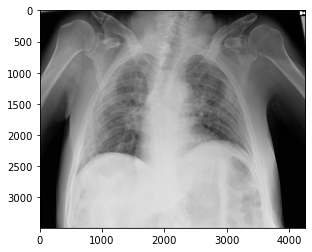

In [55]:
img = dcmread(sample_i)
plt.imshow(img.pixel_array, cmap=plt.cm.gray)

In [39]:
import numpy as np
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut

import matplotlib.pyplot as plt
%matplotlib inline


def read_xray(path, voi_lut = True, fix_monochrome = True):
    dicom = pydicom.read_file(path)
    
    # VOI LUT (if available by DICOM device) is used to transform raw DICOM data to "human-friendly" view
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
               
    # depending on this value, X-ray may look inverted - fix that:
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
        
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
        
    return data

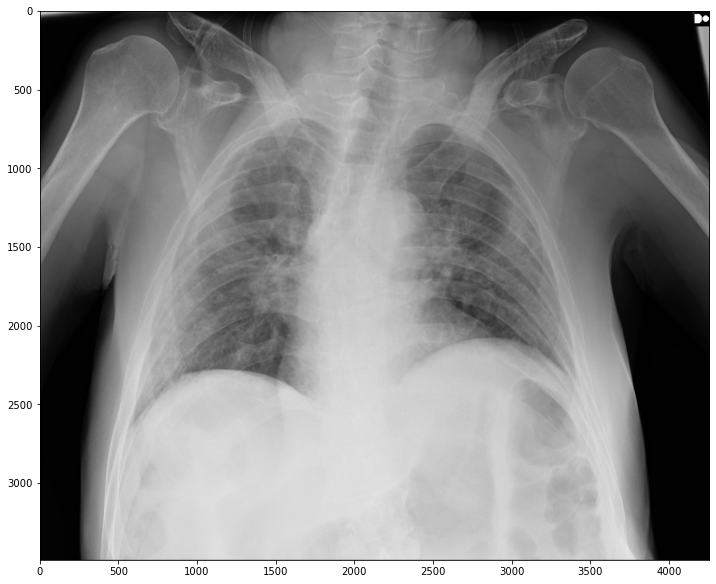

In [41]:
img = read_xray(sample_i)
plt.figure(figsize=(12,12))
plt.imshow(img, 'gray')

In [ ]:
img_data = '000a312787f2_image'


In [16]:
links[0]

'C:/Users/cathx/repos/covid19/train/00086460a852/9e8302230c91/65761e66de9f.dcm'

In [5]:
import pydicom as dicom
import matplotlib.pylab as plt

# specify your image path
image_path = 'data/train_images/sample.dcm'
ds = dicom.dcmread(image_path)

plt.imshow(ds.pixel_array)

FileNotFoundError: [Errno 2] No such file or directory: 'data/train_images/sample.dcm'